# Initial Setup

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update({'font.size': 14})
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

## Dataset locations

In [2]:
new_dataset = 'cleaned/'
raw_dataset = 'raw/'
old_dataset = '../dataset_raw/CovidDecember12-2021/'

## Utils

In [3]:
def valid_date(date):
    try:
        pd.to_datetime(date)
        return True
    except:
        return False

def plot_comparison(merged:pd.DataFrame, title:str, selected_fips:list[int]=[1001], fontsize=14):
    for fips in selected_fips:
        plt.figure()
        merged_selected = merged[merged['FIPS']==fips].drop(columns='FIPS')
        merged_selected = merged_selected.set_index('Date')
        merged_selected.plot(figsize=(18,8))

        # adding label to x-axis
        plt.xlabel('Date')

        plt.title(f'{title} | County {fips}')
        
        # adding legend.
        plt.legend()

# Description

https://www.niehs.nih.gov/research/programs/coronavirus/covid19pvi/details/

## Used
### Source found
* Air Pollution.csv
* Testing.csv
* US_daily_cumulative_cases_Dec12.csv
* Vaccination.csv
* VaccinationOneDose.csv
* Disease Spread.csv
* Health Disparities.csv
* Comorbidities.csv
* Age Distribution.csv
* Social Distancing.csv
* Mobility.csv
* Residential Density.csv
* Transmissible Cases.csv
  
## Not used
* 2020votes.csv
* Alaskavoting2016.csv
* Demographics.csv
* Hospital Beds.csv
* [US_daily_cumulative_deaths_Dec12.csv](https://usafacts.org/visualizations/coronavirus-covid-19-spread-map)

## Supporting files
### Source found
* [RuralityCodes.csv](https://www.ers.usda.gov/data-products/rural-urban-commuting-area-codes.aspx)
* Rurality_Median_Mad.csv - Calculated from `RuralityCodes.csv`.
* [Population.csv](https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/)

# Air polution

* static
* Average daily density of fine particulate matter in micrograms per cubic meter (PM2.5) from 2014 Environmental Public Health Tracking Network. Air pollution has been associated with more severe outcomes from COVID-19 infection.
* Source [county health ranking](https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation)

## Old

In [4]:
old = pd.read_csv(old_dataset+'Air Pollution.csv')
old.head()

,Name,FIPS,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,...,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22
0,"Alabama, Autauga",1001,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,...,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958
1,"Alabama, Baldwin",1003,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,...,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126,0.437126
2,"Alabama, Barbour",1005,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,...,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982,0.508982
3,"Alabama, Bibb",1007,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,...,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018,0.491018
4,"Alabama, Blount",1009,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,...,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958,0.520958


In [5]:
old.rename(columns={'2020-02-28':'Air pollution'}, inplace=True)
old = old[['FIPS', 'Air pollution']]

## New

In [6]:
new = pd.read_csv(new_dataset+'Health rank measure.csv')
new = new[['FIPS', 'Average Daily PM2.5']]
new[['Average Daily PM2.5']] = MinMaxScaler().fit_transform(new[['Average Daily PM2.5']])

## Merge and compare
Found an exact match between old and calculated value.

<AxesSubplot:xlabel='FIPS'>

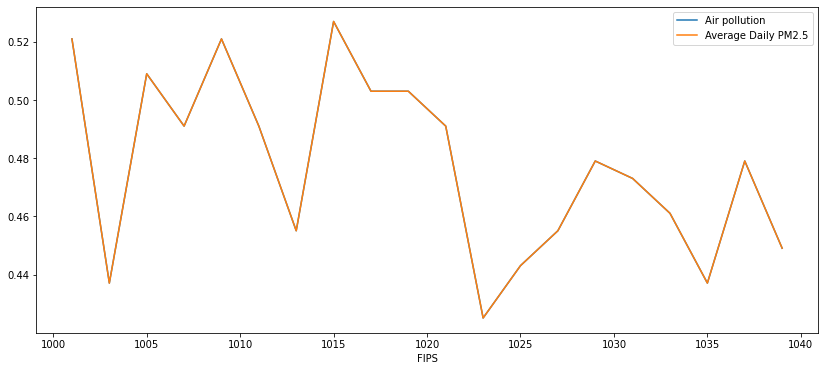

In [7]:
merged = old.merge(new, on=['FIPS'], how='inner').reset_index(drop=True)
merged = merged.set_index('FIPS')
merged.iloc[:20, :].plot(figsize=(14, 6))

In [8]:
(merged['Air pollution'] - merged['Average Daily PM2.5']).describe()

count    3.108000e+03
mean    -3.600723e-17
std      5.223015e-17
min     -2.220446e-16
25%     -5.551115e-17
50%     -5.551115e-17
75%      0.000000e+00
max      1.110223e-16
dtype: float64

# Testing
Number of people who were tested on that day in that county. The new data source is “County - Testing Counts - CDC” file from [US Covid Atlas (theuscovidatlas.org)](https://theuscovidatlas.org/download).

The old dataset is a wrong one. It is state lavel test data copied to county level after MinMaxScaling on each date column.  So there is no need to compare.

In [9]:
old = pd.read_csv(old_dataset+'Testing.csv')
old.head()

,Name,FIPS,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,...,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22
0,"Alabama, Autauga",1001,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971
1,"Alabama, Baldwin",1003,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971
2,"Alabama, Barbour",1005,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971
3,"Alabama, Bibb",1007,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971
4,"Alabama, Blount",1009,0.0,0.0,0.0,0.0,0.0,0.012,0.059414,0.047584,...,0.675364,0.675585,0.675732,0.675925,0.676493,0.677327,0.677327,0.677327,0.677587,0.677971


In [10]:
new = pd.read_csv(new_dataset+'Testing.csv')
new.head()

,FIPS,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,...,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27
0,1001,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.3,1.0,...,65.3,60.9,73.9,72.3,70.6,80.1,71.0,71.1,69.4,64.1
1,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,178.9,174.6,168.1,168.9,163.4,155.1,152.6,149.9,153.3,161.1
2,1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.9,16.0,17.0,17.4,17.0,14.6,14.0,14.7,14.7,14.3
3,1007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.7,23.3,24.3,25.3,24.1,22.0,20.1,18.0,17.7,16.6
4,1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.9,43.7,43.3,39.9,36.9,33.6,30.6,29.3,32.0,32.0


# Cases
Daily covid cases from [USAFacts](https://usafacts.org/).

## Old

In [11]:
old = pd.read_csv(old_dataset + 'US_daily_cumulative_cases_Dec12.csv')
old.head()

,Unnamed: 0,FIPS,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,...,2021-11-20,2021-11-21,2021-11-22,2021-11-23,2021-11-24,2021-11-25,2021-11-26,2021-11-27,2021-11-28,2021-11-29
0,0,1001,0,0,0,0,0,0,0,0,...,10457,10457,10457,10477,10495,10508,10512,10512,10512,10512
1,1,1003,0,0,0,0,0,0,0,0,...,37959,37959,37959,38000,38014,38042,38061,38061,38061,38061
2,2,1005,0,0,0,0,0,0,0,0,...,3660,3660,3660,3688,3690,3691,3691,3691,3691,3691
3,3,1007,0,0,0,0,0,0,0,0,...,4333,4333,4333,4337,4338,4339,4340,4340,4340,4340
4,4,1009,0,0,0,0,0,0,0,0,...,10621,10621,10621,10640,10659,10696,10700,10700,10700,10700


In [12]:
old.drop(
    columns=[col for col in old.columns if 'Unnamed:' in col], 
    inplace=True
)

# Convert to daily
date_columns = [col for col in old.columns if valid_date(col)]
df_advanced = old[date_columns].shift(periods=1, axis=1, fill_value=0)
old[date_columns] -= df_advanced[date_columns]
old.fillna(0, inplace=True)

old = old.melt(
    id_vars= ['FIPS'],
    var_name='Date', value_name='Cases'
).reset_index(drop=True)

# set negative daily cases to 0
old.loc[old['Cases']<0, 'Cases'] = 0

## New

In [13]:
# new data is already coverted to daily cases
new = pd.read_csv(new_dataset + 'Cases.csv')
new.head()

,FIPS,Date,Cases
0,1001,2020-01-22,0
1,1003,2020-01-22,0
2,1005,2020-01-22,0
3,1007,2020-01-22,0
4,1009,2020-01-22,0


### Merge and compare with old data

In [14]:
merged = old.merge(new, on=['FIPS', 'Date'], how='inner', suffixes=('_old', '_new'))
(merged['Cases_old'] - merged['Cases_new']).describe()

count    2.010880e+06
mean    -1.302370e-01
std      1.340113e+02
min     -2.985200e+04
25%     -2.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      2.834700e+04
dtype: float64

<Figure size 432x288 with 0 Axes>

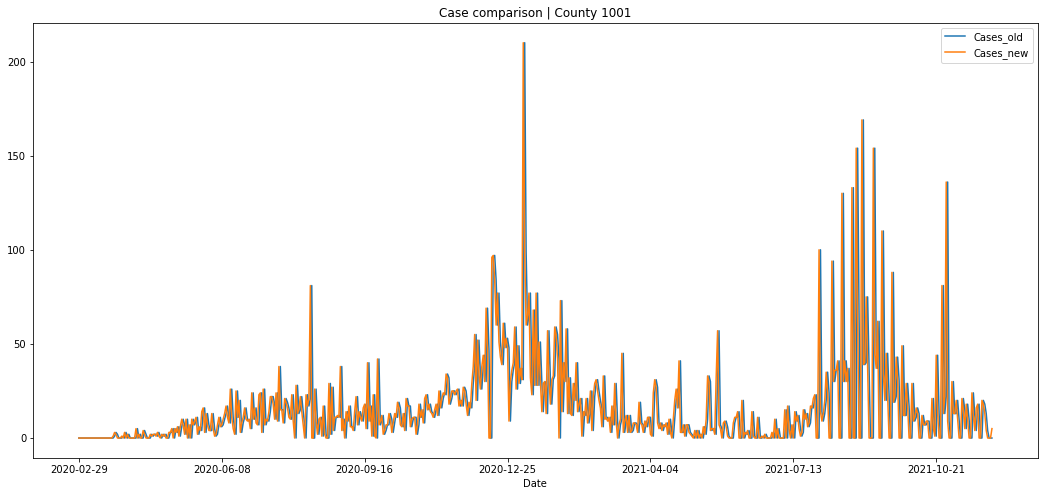

<Figure size 432x288 with 0 Axes>

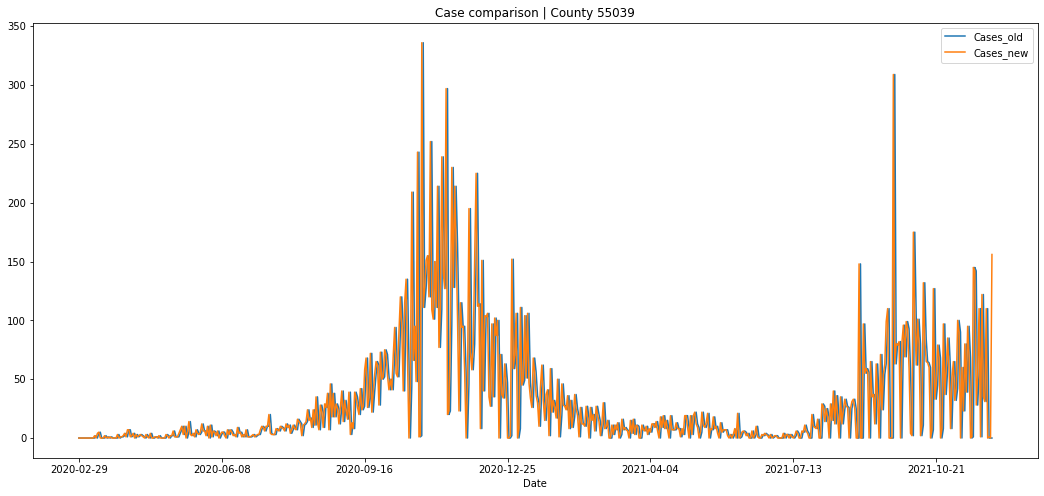

In [15]:
plot_comparison(merged, 'Case comparison', selected_fips=[1001, 55039])

In [16]:
merged[abs(merged['Cases_old'] - merged['Cases_new'])>200]['FIPS'].unique()

array([36047, 36081, 36005, ..., 33019, 50007, 50021], dtype=int64)

# Vaccination (one dose )

## Description
| Component(s)	| Update Freq.	| Description/Rationale | Source | 
|:---:|:---:|:---:|:---:|
| Administered_Dose1_Pop_Pct | Daily | Percent of Total Pop with at least one Dose by State of Residence | [CDC](https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh) |

## Old

In [17]:
old = pd.read_csv(old_dataset + 'VaccinationOneDose.csv')
print(old.shape)
old.head()

(3142, 359)


,Unnamed: 0,Name,FIPS,2020-12-13 00:00:00,2020-12-14 00:00:00,2020-12-15 00:00:00,2020-12-16 00:00:00,2020-12-17 00:00:00,2020-12-18 00:00:00,2020-12-19 00:00:00,...,2021-11-24 00:00:00,2021-11-25 00:00:00,2021-11-26 00:00:00,2021-11-27 00:00:00,2021-11-28 00:00:00,2021-11-29 00:00:00,2021-11-30 00:00:00,2021-12-01 00:00:00,2021-12-02 00:00:00,2021-12-03 00:00:00
0,0,Abbeville County,45001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.8,40.8,40.8,40.8,40.8,41.0,41.0,41.0,41.1,41.1
1,1,Acadia Parish,22001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.6,54.6,54.6,54.6,54.6,54.7,54.7,54.8,54.9,54.9
2,2,Accomack County,51001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,74.3,74.3,74.3,74.3,74.3,74.6,74.6,74.7,74.8,74.9
3,3,Ada County,16001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.5,58.5,58.5,58.5,58.5,58.7,58.7,58.8,58.8,58.9
4,4,Adair County,19001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.7,49.7,49.7,49.7,49.7,49.7,50.0,50.0,50.1,50.1


In [18]:
old.drop(columns=['Unnamed: 0', 'Name'], inplace=True)
old = old.melt(
    id_vars= ['FIPS'],
    var_name='Date', value_name='Dose'
).reset_index(drop=True)
old['Date'] = pd.to_datetime(old['Date'])

## New

In [19]:
new = pd.read_csv(new_dataset + 'Vaccination.csv')
new['Date'] = pd.to_datetime(new['Date'])

new.head()

,Date,FIPS,Administered_Dose1_Pop_Pct,Series_Complete_Pop_Pct
0,2022-05-02,6101,67.4,61.3
1,2022-05-02,13311,39.5,35.7
2,2022-05-02,16045,46.0,40.1
3,2022-05-02,17141,62.9,58.2
4,2022-05-02,17147,66.9,62.5


## Merge and compare
Almost exact match, except few anomalies.

In [20]:
merged = old.merge(
    new[['Date', 'FIPS', 'Administered_Dose1_Pop_Pct']],
    on=['FIPS', 'Date'], how='inner'
)

# Some couties has null values in the cdc dataset. But old data has values in those instances.
(merged['Dose'] - merged['Administered_Dose1_Pop_Pct']).describe()

count    1.118552e+06
mean     2.643686e-03
std      1.090182e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.500000e+00
dtype: float64

<Figure size 432x288 with 0 Axes>

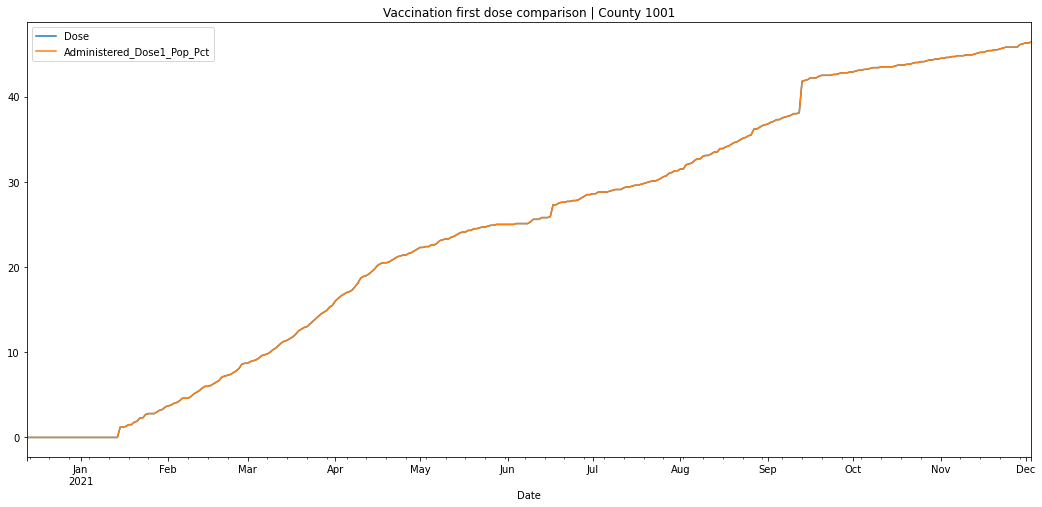

<Figure size 432x288 with 0 Axes>

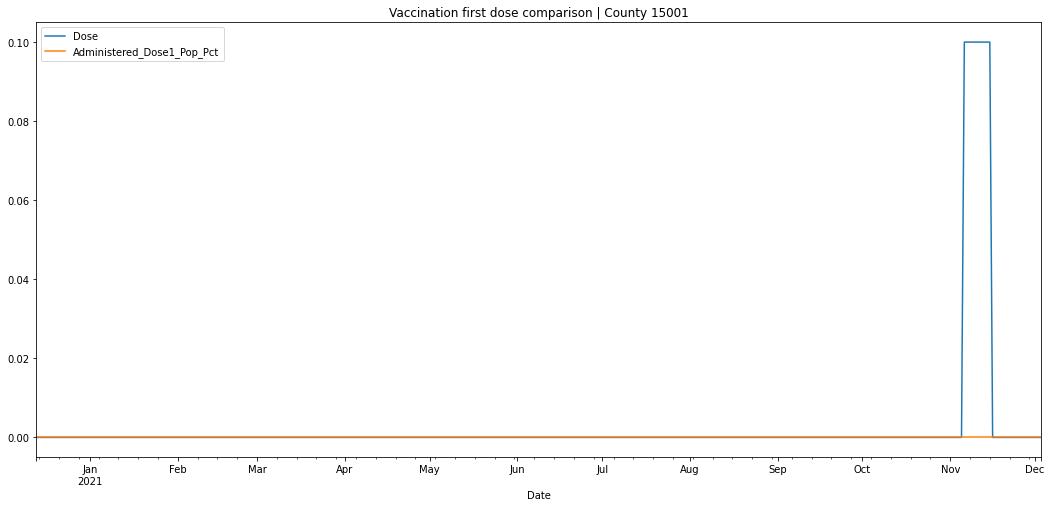

In [21]:
plot_comparison(merged, 'Vaccination first dose comparison', [1001, 15001])

In [22]:
merged[merged['Dose'] != merged['Administered_Dose1_Pop_Pct']]['FIPS'].unique()

array([25001, 25007, 25019, 15003, 15009, 15001], dtype=int64)

# Vaccination (complete dose)

## Description
| Component(s)	| Update Freq.	| Description/Rationale | Source | 
|:---:|:---:|:---:|:---:|
| Series_Complete_Pop_Pct | Daily | Percent of people who are fully vaccinated (have second dose of a two-dose vaccine or one dose of a single-dose vaccine) based on the jurisdiction and county where recipient lives | [CDC](https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh) |

## Old

In [23]:
old = pd.read_csv(old_dataset + 'Vaccination.csv')
print(old.shape)
old.head()

(3142, 359)


,Unnamed: 0,Name,FIPS,2020-12-13 00:00:00,2020-12-14 00:00:00,2020-12-15 00:00:00,2020-12-16 00:00:00,2020-12-17 00:00:00,2020-12-18 00:00:00,2020-12-19 00:00:00,...,2021-11-24 00:00:00,2021-11-25 00:00:00,2021-11-26 00:00:00,2021-11-27 00:00:00,2021-11-28 00:00:00,2021-11-29 00:00:00,2021-11-30 00:00:00,2021-12-01 00:00:00,2021-12-02 00:00:00,2021-12-03 00:00:00
0,0,Abbeville County,45001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.9,36.9,36.9,36.9,36.9,36.9,36.9,37.0,37.1,37.1
1,1,Acadia Parish,22001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.0,49.0,49.0,49.0,49.0,49.1,49.1,49.2,49.2,49.2
2,2,Accomack County,51001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,66.1,66.1,66.1,66.1,66.1,66.3,66.3,66.3,66.5,66.6
3,3,Ada County,16001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.4,53.4,53.4,53.4,53.4,53.5,53.5,53.6,53.6,53.6
4,4,Adair County,19001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.6,45.6,45.6,45.6,45.6,45.6,45.8,45.8,45.9,46.0


In [24]:
old.drop(columns=['Unnamed: 0', 'Name'], inplace=True)
old = old.melt(
    id_vars= ['FIPS'],
    var_name='Date', value_name='Dose'
).reset_index(drop=True)
old['Date'] = pd.to_datetime(old['Date'])

## Merge and compare
The new vaccination dataset was already loaded in the previous section. Found almost an exact match.

In [25]:
merged = old.merge(
    new[['Date', 'FIPS', 'Series_Complete_Pop_Pct']],
    on=['FIPS', 'Date'], how='inner'
)

# Some couties has null values in the cdc dataset. But old data has values in those instances.
(merged['Dose'] - merged['Series_Complete_Pop_Pct']).describe()

count    1.118552e+06
mean     1.945551e-03
std      8.285278e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.600000e+00
dtype: float64

<Figure size 432x288 with 0 Axes>

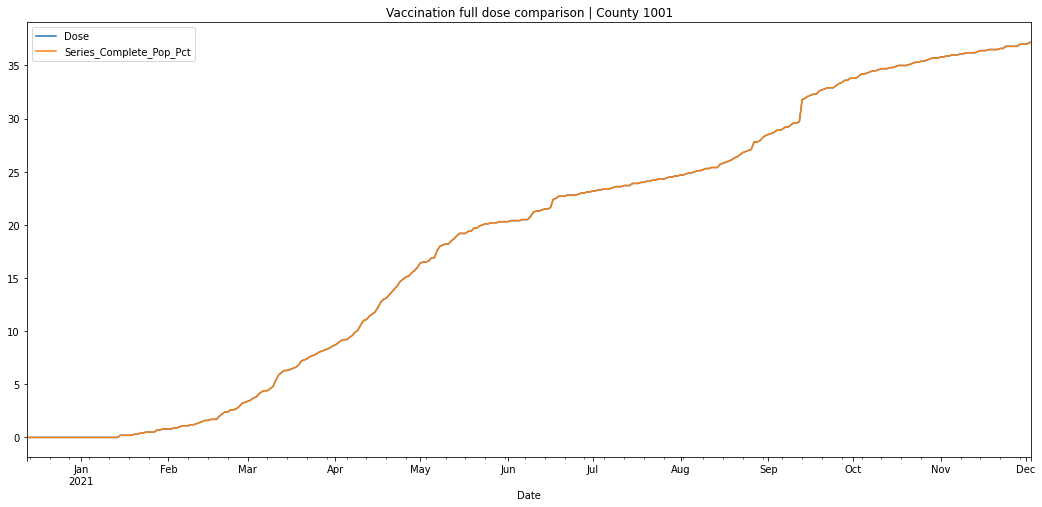

<Figure size 432x288 with 0 Axes>

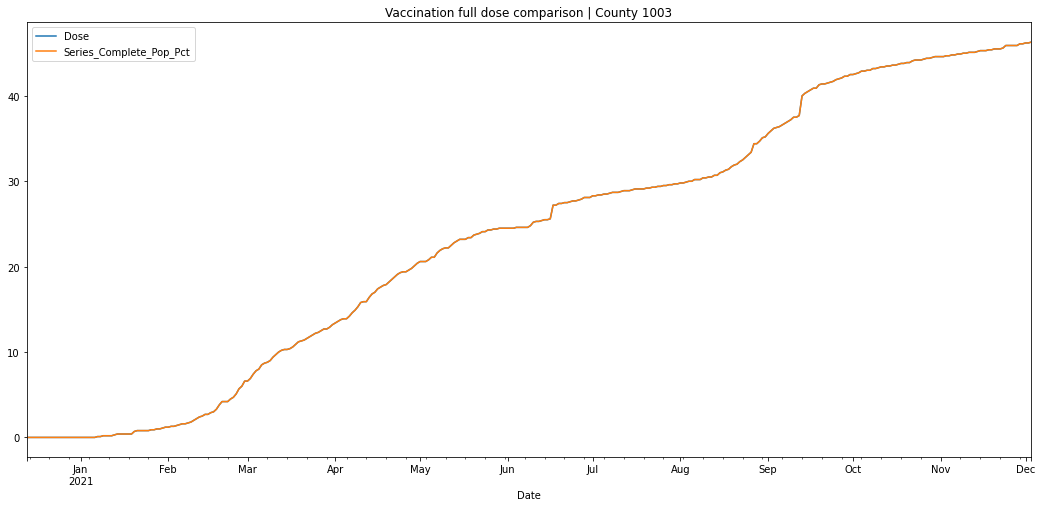

In [26]:
plot_comparison(merged, 'Vaccination full dose comparison', selected_fips=[1001, 1003])

In [27]:
merged[merged['Dose'] != merged['Series_Complete_Pop_Pct']]['FIPS'].unique()

array([25001, 25007, 25019, 15003], dtype=int64)

# Spread

## Description
| Component(s)	| Update Freq.	| Description/Rationale | Source | 
|:---:|:---:|:---:|:---:|
|Disease Spread|Daily	|	Fraction of total cases that are from the last 14 days (one incubation period). Because COVID-19 is thought to have an incubation period of about 14 days, only a sustained decline in new infections over 2 weeks is sufficient to signal reduction in disease spread. This metric is always between 0 and 1, with values near 1 during exponential growth phase, and declining linearly to zero over 14 days if there are no new infections. |	[USA Facts](https://usafacts.org/issues/coronavirus/)|

## Old

In [28]:
old = pd.read_csv(old_dataset+'Disease Spread.csv')
old.head()

,Name,FIPS,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,...,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22
0,"Alabama, Autauga",1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.051575,0.051575,0.051575,0.047305,0.048784,0.046225,0.041590,0.041590,0.041590,0.041590
1,"Alabama, Baldwin",1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040835,0.040835,0.040835,0.039256,0.040424,0.041415,0.037720,0.037720,0.037720,0.037720
2,"Alabama, Barbour",1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.034244,0.034244,0.034244,0.042569,0.045127,0.045521,0.043946,0.043946,0.043946,0.043946
3,"Alabama, Bibb",1007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029638,0.029638,0.029638,0.027553,0.031777,0.031256,0.028236,0.028236,0.028236,0.028236
4,"Alabama, Blount",1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.046665,0.046665,0.046665,0.040140,0.040699,0.041655,0.032773,0.032773,0.032773,0.032773


In [29]:
old = old.drop(columns='Name').melt(
    id_vars= ['FIPS'],
    var_name='Date', value_name='Spread'
).reset_index(drop=True)

old['Date'] = pd.to_datetime(old['Date'])
old.fillna(0, inplace=True)

## New

In [30]:
new = pd.read_csv(new_dataset + 'Disease Spread.csv')
new.head()

,FIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,...,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08
0,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008227,0.013937,0.041546,0.041546,0.039388,0.042738,0.042618,0.037948,0.042441,0.043083
1,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010249,0.004692,0.014178,0.014178,0.010214,0.009576,0.011433,0.008369,0.008735,0.010662
2,1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.100929,0.099872,0.282330,0.282330,0.276355,0.223518,0.222930,0.161375,0.162248,0.162248
3,1007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004657,0.003260,0.007900,0.007900,0.007900,0.008705,0.006512,0.003972,0.004766,0.005559
4,1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003210,0.002206,0.006804,0.006804,0.005670,0.004687,0.006077,0.003764,0.010251,0.011273


In [31]:
new = new.melt(
    id_vars= ['FIPS'],
    var_name='Date', value_name='Spread'
).reset_index(drop=True)

new['Date'] = pd.to_datetime(new['Date'])
new.fillna(0, inplace=True)

### Merge and compare

In [32]:
merged = old.merge(new,on=['FIPS', 'Date'], how='inner', suffixes=('_old', '_new'))

# Some couties has null values in the cdc dataset. But old data has values in those instances.
(merged['Spread_old'] - merged['Spread_new']).describe()

count    1.992028e+06
mean     7.536323e-03
std      6.629677e-02
min     -1.000000e+00
25%     -4.424098e-04
50%      1.209401e-03
75%      1.464468e-02
max      1.000000e+00
dtype: float64

<Figure size 432x288 with 0 Axes>

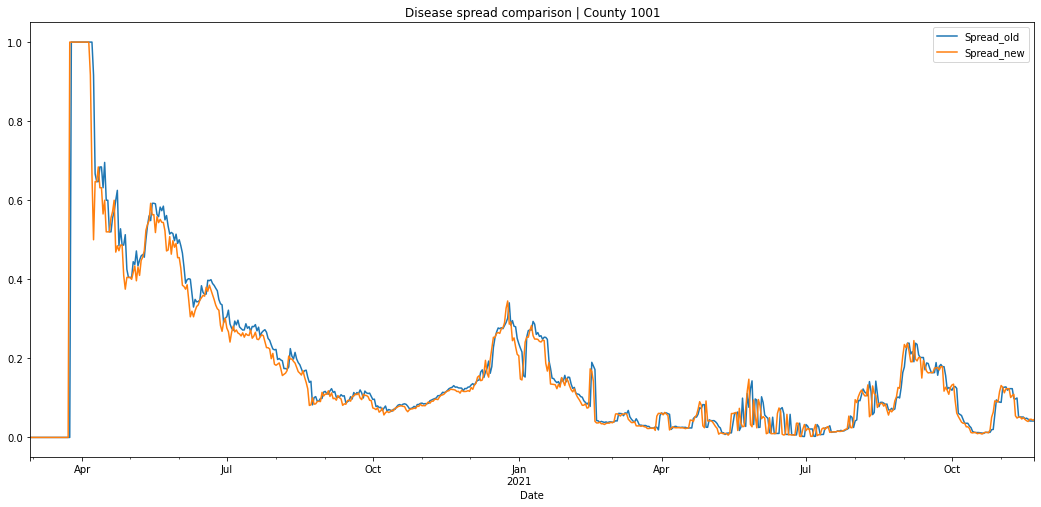

<Figure size 432x288 with 0 Axes>

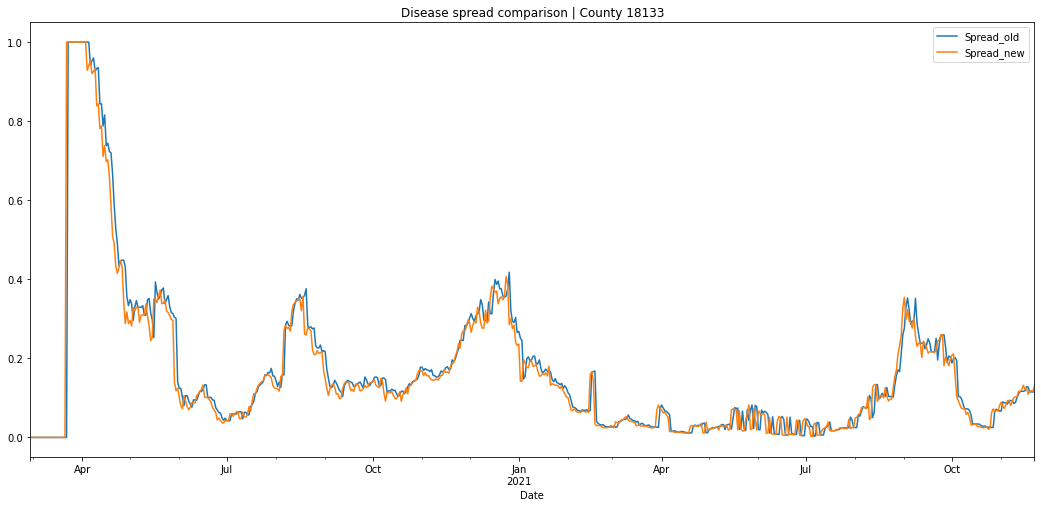

In [33]:
plot_comparison(merged, 'Disease spread comparison', [1001, 18133])

# Age Distribution

## Description
| Component(s)	| Update Freq.	| Description/Rationale | Source | 
|:---:|:---:|:---:|:---:|
| % age 65 and over	| Static	|	Aged 65 or Older from 2014-2018 ACS. Older ages have been associated with more severe outcomes from COVID-19 infection. |	2018 CDC Social Vulnerability Index|

## Old

In [34]:
old = pd.read_csv(old_dataset+'Age Distribution.csv')
old.rename(columns={'2020-02-28':'Age Distribution'}, inplace=True)
old = old[['FIPS', 'Age Distribution']]
old.head()

,FIPS,Age Distribution
0,1001,0.501651
1,1003,0.609505
2,1005,0.579674
3,1007,0.542700
4,1009,0.575510


## New

In [35]:
name = 'EP_AGE65'
new = pd.read_csv(raw_dataset + 'CDC_Social_Vulnerability_Index_2018_-_USA.csv')
new = new[['FIPS', name]]
new[[name]] = MinMaxScaler().fit_transform(new[[name]])
new.head()

,FIPS,EP_AGE65
0,1001,0.208494
1,1003,0.303089
2,1005,0.274131
3,1007,0.241313
4,1009,0.270270


## Merge and compare
The old value is always 0.3 higher than the correct value.

In [36]:
merged = old.merge(new, on=['FIPS'], how='inner').reset_index(drop=True)
merged = merged.set_index('FIPS')
(merged['Age Distribution'] - merged[name]).describe()

count    3142.000000
mean        0.294331
std         0.020429
min         0.000000
25%         0.291877
50%         0.302072
75%         0.305507
max         0.306435
dtype: float64

<AxesSubplot:xlabel='FIPS'>

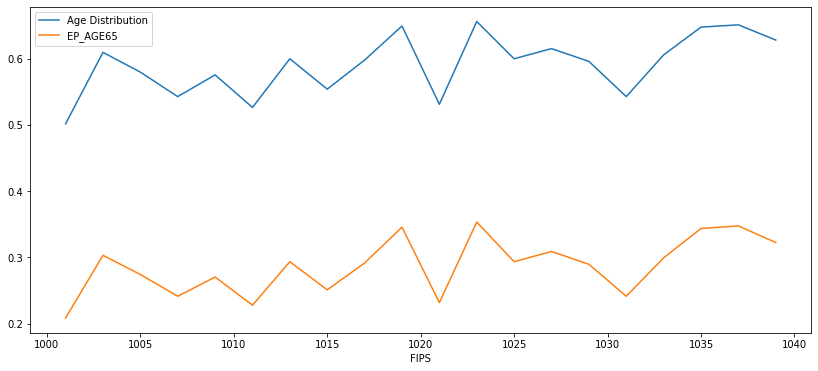

In [37]:
merged.iloc[:20, :].plot(figsize=(14,6))

# Residential Density

## Description
| Component(s)	| Update Freq.	| Description/Rationale | Source | 
|:---:|:---:|:---:|:---:|
| Residential Density	| Static	|	Integrates data from the 2014-2018 ACS on families in multi-unit structures, mobile homes, over-crowding (more people than rooms), being without a vehicle, and persons in institutionalized group quarters. All of these variables are associated with greater residential density, which is expected to increase the spread of infection because more people are in closer proximity to each other.	| 2018 CDC Social Vulnerability Index (SVI Housing Type & Transportation Theme) |

## Old

In [38]:
old = pd.read_csv(old_dataset+'Residential Density.csv')
old.rename(columns={'2020-02-28':'Residential Density'}, inplace=True)
old = old[['FIPS', 'Residential Density']]
old.head()

,FIPS,Residential Density
0,1001,0.3741
1,1003,0.3359
2,1005,0.9889
3,1007,0.7189
4,1009,0.1741


## New

In [39]:
new = pd.read_csv(raw_dataset + 'CDC_Social_Vulnerability_Index_2018_-_USA.csv')
new = new[['FIPS', 'RPL_THEME4']]
new.head()

,FIPS,RPL_THEME4
0,1001,0.3741
1,1003,0.3359
2,1005,0.9889
3,1007,0.7189
4,1009,0.1741


## Merge and compare
Found exact match between old and calculated data.

In [40]:
merged = old.merge(new, on=['FIPS'], how='inner').reset_index(drop=True)
merged = merged.set_index('FIPS')
(merged['Residential Density'] - merged['RPL_THEME4']).describe()

count    3.142000e+03
mean    -6.592170e-19
std      1.403998e-17
min     -1.110223e-16
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.110223e-16
dtype: float64

<AxesSubplot:xlabel='FIPS'>

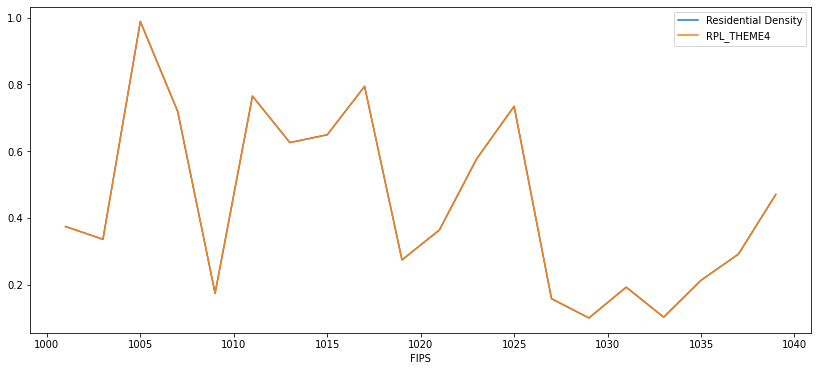

In [41]:
merged.iloc[:20, :].plot(figsize=(14, 6))

# Demographics

## Description
Source County health rankings dataset, additional measure data tab

| Component(s)	| Update Freq.	| Description/Rationale |
|:---:|:---:|:---:|
| % Black	| Static	|	Percentage of population who self-identify as Black or African American.	| 2018 Census Population Estimates from CHR (County Health Rankings and Roadmaps) |
| % Native|	Static	|	Percentage of population who self-identify as American Indian or Alaska Native.	2018 Census Population Estimates from CHR (County Health Rankings and Roadmaps)|

## Old

In [42]:
old = pd.read_csv(old_dataset+'Demographics.csv')
old.rename(columns={'2020-02-28':'Demographics'}, inplace=True)
old = old[['FIPS', 'Demographics']]
old.head()

,FIPS,Demographics
0,1001,0.563653
1,1003,0.534158
2,1005,0.678794
3,1007,0.563162
4,1009,0.350141


## New

In [43]:
new = pd.read_csv(new_dataset+'Health additional measure.csv')
feature_columns = ['% Black', '% American Indian & Alaska Native']
new = new[['FIPS'] + feature_columns]

new.head()

,FIPS,% Black,% American Indian & Alaska Native
0,1000,26.497733,0.703271
1,1001,19.343177,0.480207
2,1003,8.783976,0.772399
3,1005,48.032635,0.659137
4,1007,21.120536,0.437500


In [44]:
new[feature_columns] = MinMaxScaler().fit_transform(new[feature_columns])
new['mean'] = new[feature_columns].apply(np.mean, axis=1)
new[['mean']] = MinMaxScaler().fit_transform(new[['mean']])

## Merge and compare
The old data doesn't match with data calculated following their documentation.

In [45]:
merged = old.merge(new[['FIPS', 'mean']], on=['FIPS'], how='inner').reset_index(drop=True)
merged = merged.set_index('FIPS')
(merged['Demographics'] - merged['mean']).describe()

count    3142.000000
mean        0.305184
std         0.129230
min        -0.363773
25%         0.240265
50%         0.322528
75%         0.386577
max         0.864854
dtype: float64

<AxesSubplot:xlabel='FIPS'>

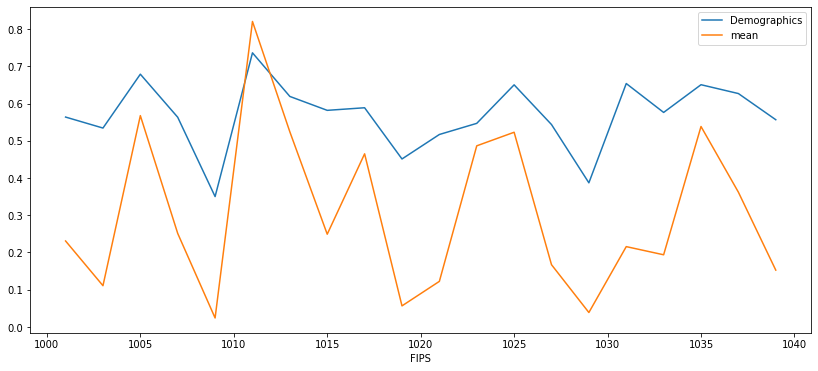

In [46]:
merged.iloc[:20, :].plot(figsize=(14, 6))

# Co-morbidities

## Description

County health rankings dataset, additional measure data tab. All following data are from 2020 County Health Rankings.

| Component(s)	| Update Freq.	| Description/Rationale |
|:---:|:---:|:---:|
| Premature death |	Static | Years of potential life lost before age 75 per 100,000 population (age-adjusted) based on 2016-2018 National Center for Health Statistics - Mortality Files. This is a broad measure of health, and a proxy for cardiovascular and pulmonary diseases that have been associated with more severe outcomes from COVID-19 infection.	| 
| Smoking	|Static	|	Percentage of adults who are current smokers from 2017 Behavioral Risk Factor Surveillance System. Smoking has been associated with more severe outcomes from COVID-19 infection, and also causes cardiovascular and pulmonary disease.	|
| Diabetes|	Static	|	Percentage of adults aged 20 and above with diagnosed diabetes from 2016 United States Diabetes Surveillance System. Diabetes has been associated with more severe outcomes from COVID-19 infection.|
| Obesity	|Static	|	Percentage of the adult population (age 20 and older) that reports a body mass index (BMI) greater than or equal to 30 kg/m2. Obesity has been associated with more severe outcomes from COVID-19 infection.|

## Old

In [47]:
name = 'Comorbidities'
old = pd.read_csv(old_dataset + 'Comorbidities.csv')
old.rename(columns={'2020-02-28':name}, inplace=True)
old = old[['FIPS',name]]
old.head()

,FIPS,Comorbidities
0,1001,0.362432
1,1003,0.325043
2,1005,0.556276
3,1007,0.490398
4,1009,0.479312


## New

In [48]:
new = pd.read_csv(new_dataset + 'Health rank measure.csv')
new = new[['FIPS', '% Smokers', '% Adults with Obesity','Years of Potential Life Lost Rate']]

additional = pd.read_csv(new_dataset + 'Health additional measure.csv')
additional = additional[['FIPS', '% Adults with Diabetes']]

new = new.merge(additional, on='FIPS', how='inner').reset_index(drop=True)
new.head()

,FIPS,% Smokers,% Adults with Obesity,Years of Potential Life Lost Rate,% Adults with Diabetes
0,1001,18.081557,33.3,8128.591190,11.1
1,1003,17.489033,31.0,7354.122530,10.7
2,1005,21.999985,41.7,10253.573403,17.6
3,1007,19.114200,37.6,11977.539484,14.5
4,1009,19.208672,33.8,11335.071134,17.0


In [49]:
feature_columns = ['% Smokers', '% Adults with Obesity','Years of Potential Life Lost Rate', '% Adults with Diabetes']
new[feature_columns] = MinMaxScaler().fit_transform(new[feature_columns])

new['mean'] = new[feature_columns].apply(np.mean, axis=1)
new[['mean']] = MinMaxScaler().fit_transform(new[['mean']])

## Merge and compare
Matches almost exactly to calculated value.

In [50]:
merged = old.merge(new[['FIPS', 'mean']], on=['FIPS'], how='inner').reset_index(drop=True)
merged = merged.set_index('FIPS')
(merged['mean']  - merged['Comorbidities']).describe()

count    3142.000000
mean        0.017685
std         0.022319
min        -0.458911
25%         0.010722
50%         0.014749
75%         0.019193
max         0.209825
dtype: float64

<AxesSubplot:xlabel='FIPS'>

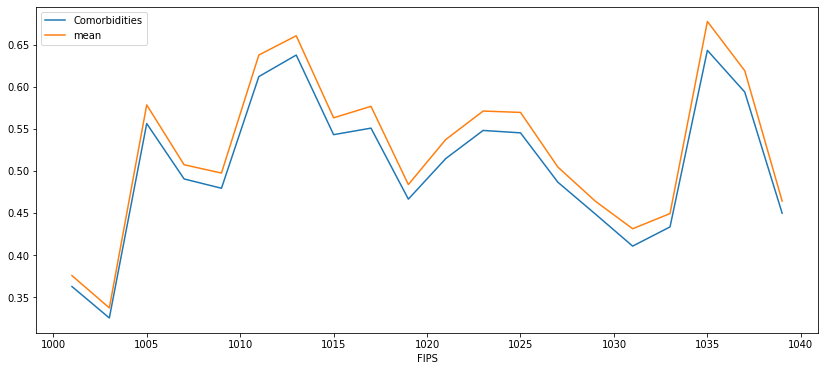

In [51]:
merged.iloc[:20, :].plot(figsize=(14, 6))

# Health Disparities

## Description
Corresponding column names in the SVI file is mentioned in ().

| Component(s)	| Update Freq.	| Description/Rationale | Source |
|:---:|:---:|:---:|:---:|
| Uninsured|	Static	|	Percentage uninsured in the total civilian noninstitutionalized population estimate, 2014- 2018 ACS (EP_UNINSUR). Individuals without insurance are more likely to be undercounted in infection statistics, and may have more severe outcomes due to lack of treatment.|	[2018 CDC Social Vulnerability Index](https://svi.cdc.gov/data-and-tools-download.html)|
| SVI Socioeconomic Status|	Static	|	Integrates data from 2014-2018 ACS on percent below poverty (EP_POV), percent unemployed (historical) (EP_UNEMP), income (EP_PCI), and percent without a high school diploma (EP_NOHSDP). Lower SES are more likely to be undercounted in infection statistics, and may have more severe outcomes due to lack of treatment.|	[2018 CDC Social Vulnerability Index](https://svi.cdc.gov/data-and-tools-download.html) (SVI Socioeconomic Status score)|

## Old

In [52]:
name = 'Health Disparities'
old = pd.read_csv(old_dataset+f'{name}.csv')
old.rename(columns={'2020-02-28': name}, inplace=True)
old = old[['FIPS', name]]
old.head()

,FIPS,Health Disparities
0,1001,0.260555
1,1003,0.203906
2,1005,0.656229
3,1007,0.531989
4,1009,0.446228


## New

In [53]:
new = pd.read_csv('raw/CDC_Social_Vulnerability_Index_2018_-_USA.csv')
new = new[['FIPS', 'RPL_THEME1', 'EP_UNINSUR']]

# null themes have value -999
new = new[new['RPL_THEME1'] >= 0]
new.head()

,FIPS,RPL_THEME1,EP_UNINSUR
0,1001,0.3631,7.1
1,1003,0.2232,10.2
2,1005,0.9780,11.2
3,1007,0.7694,7.9
4,1009,0.6143,11.0


In [54]:
new[['EP_UNINSUR']] = MinMaxScaler().fit_transform(new[['EP_UNINSUR']])
new['mean'] = new[['RPL_THEME1', 'EP_UNINSUR']].apply(np.mean, axis=1)
new[['mean']] = MinMaxScaler().fit_transform(new[['mean']])

## Merge and compare
The old value is almost same as calculated value

In [55]:
merged = old.merge(new[['FIPS', 'mean']], on=['FIPS'], how='inner').reset_index(drop=True)
merged = merged.set_index('FIPS')
(merged[name] - merged['mean']).describe()

count    3141.000000
mean        0.014497
std         0.015626
min        -0.069284
25%         0.004957
50%         0.013136
75%         0.023175
max         0.104894
dtype: float64

<AxesSubplot:xlabel='FIPS'>

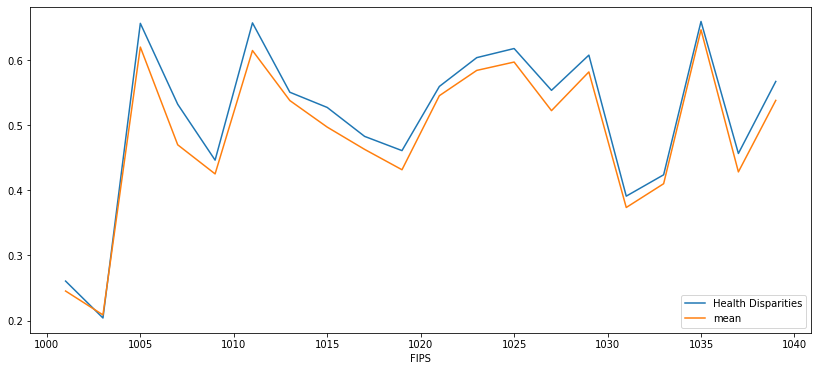

In [56]:
merged.iloc[:20, :].plot(figsize=(14, 6))

# Transmissible Cases

## Description
| Component(s)	| Update Freq.	| Description/Rationale | Source | 
|:---:|:---:|:---:|:---:|
| | Daily | Cases from the last 14 days divided by population size. Because of the 14-day incubation period, the cases identified in that time period are the most likely to be transmissible. This metric is the number of such “contagious” individuals relative to the population, so a greater number indicates more likely continued spread of disease.| [USA Facts](https://usafacts.org/issues/coronavirus/) | 

## Old

In [57]:
name = 'Transmissible'
old = pd.read_csv(old_dataset + 'Transmissible Cases.csv')
old.head()

,Name,FIPS,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,...,2021-11-13,2021-11-14,2021-11-15,2021-11-16,2021-11-17,2021-11-18,2021-11-19,2021-11-20,2021-11-21,2021-11-22
0,"Alabama, Autauga",1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.570507,0.570101,0.576466,0.591125,0.579838,0.565371,0.563097,0.563097,0.563097,0.560482
1,"Alabama, Baldwin",1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.522543,0.522171,0.528001,0.550695,0.537530,0.535876,0.535300,0.535300,0.535300,0.532813
2,"Alabama, Barbour",1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.468133,0.467800,0.473023,0.536974,0.528110,0.524045,0.532808,0.532808,0.532808,0.530333
3,"Alabama, Bibb",1007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.488808,0.488460,0.493913,0.511952,0.515692,0.507686,0.505683,0.505683,0.505683,0.503334
4,"Alabama, Blount",1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.550670,0.550278,0.556422,0.561488,0.546354,0.544680,0.521044,0.521044,0.521044,0.518623


In [58]:
old = old.drop(columns='Name').melt(
    id_vars= ['FIPS'],
    var_name='Date', value_name= name
).reset_index(drop=True)

old['Date'] = pd.to_datetime(old['Date'])
old.fillna(0, inplace=True)

old.head()

,FIPS,Date,Transmissible
0,1001,2020-02-28,0.0
1,1003,2020-02-28,0.0
2,1005,2020-02-28,0.0
3,1007,2020-02-28,0.0
4,1009,2020-02-28,0.0


## New

In [59]:
new = pd.read_csv(new_dataset + 'Transmissible Cases.csv')
new = new.melt(
    id_vars= ['FIPS'],
    var_name='Date', value_name= name
).reset_index(drop=True)

new['Date'] = pd.to_datetime(new['Date'])
new.fillna(0, inplace=True)

new.head()

,FIPS,Date,Transmissible
0,1001,2020-01-22,0.0
1,1003,2020-01-22,0.0
2,1005,2020-01-22,0.0
3,1007,2020-01-22,0.0
4,1009,2020-01-22,0.0


## Merge and compare
Doesn't match with calculated value. Need to check if it is sum of last 14 cumulative cases divided by population.

In [60]:
merged = old.merge(new, on=['FIPS', 'Date'], how='inner', suffixes=('_old', '_new'))
(merged[f'{name}_old'] - merged[f'{name}_new']).describe()

count    1.992028e+06
mean     4.260253e-01
std      1.753309e-01
min     -1.000000e+00
25%      3.777752e-01
50%      4.768402e-01
75%      5.415600e-01
max      1.000000e+00
dtype: float64

<Figure size 432x288 with 0 Axes>

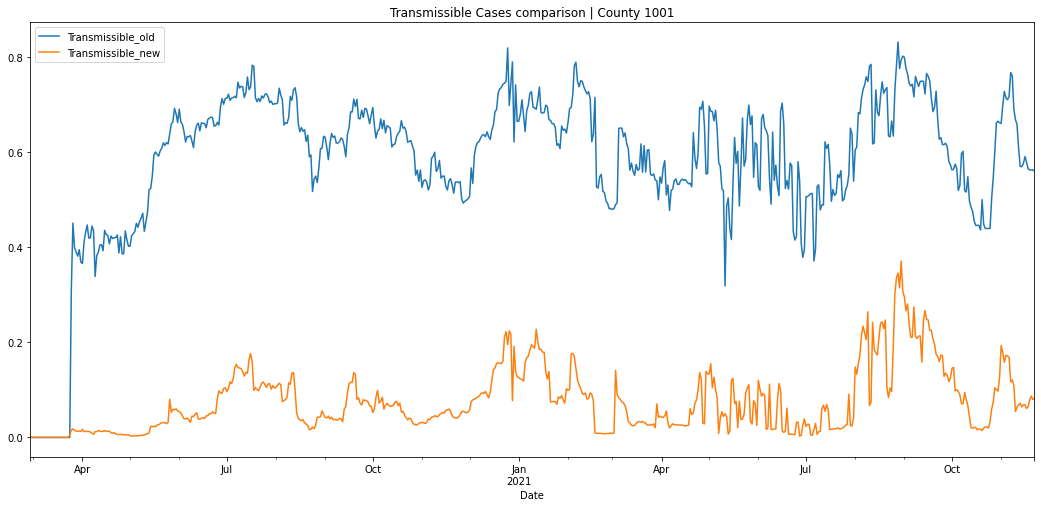

In [62]:
plot_comparison(merged, 'Transmissible Cases comparison', [1001])

# Mobility

The old mobility data is a static feature and the mean of the following two values

* **Daytime Population Density**
  * Static		
  * Estimated daytime population. Greater daytime population density is expected to increase the spread of infection because more people are in closer proximity to each other.	
  * **Source:** The field “DPOPDENSCY” (2019 Daytime Pop Density) from ESRI demographics analysis of American Community Survey data. 2018 CDC Social Vulnerability Index (adjunct variable)
* Baseline Traffic	
  * Static		
  * Average traffic volume per meter of major roadways in the county from 2018 EPA EJSCREEN. Greater traffic volume is expected to increase the spread of infection due to more people moving and interaction.	
  * **Source:** 2020 County Health Rankings

Since this is static and our new mobility data is dynamic there is no need for comparison.